In [1]:
import pandas as pd

In [2]:
id_df_train = pd.read_csv("data/train_identity.csv") 

In [3]:
id_df_train.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [4]:
id_df_train.id_12.unique()

array(['NotFound', 'Found'], dtype=object)

In [5]:
id_df_train.DeviceInfo.unique()

array(['SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', ...,
       'LDN-LX3 Build/HUAWEILDN-LX3', 'Z955A', 'LG-E975'], dtype=object)

In [6]:
id_df_train.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [7]:
tr_df_train = pd.read_csv("data/train_transaction.csv") 

In [8]:
tr_df_train.isFraud.value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [9]:
tr_df_train.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [10]:
clients = tr_df_train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain']]

In [11]:
clients.head()

,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain
0,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN
1,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com
2,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com
3,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com
4,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com


In [12]:
clients.shape

(590540, 9)

In [13]:
# удалить дубликаты
duplicates = clients.duplicated(keep='first')
clients = clients[duplicates]
print(f"Количество дубликатов: {clients.shape[0]}")

Количество дубликатов: 495618


In [14]:
clients.isna().sum()

card1                0
card2             5781
card3              337
card4              338
card5             2133
card6              337
addr1            60141
addr2            60141
P_emaildomain    81653
dtype: int64

In [15]:
clients.dtypes

card1              int64
card2            float64
card3            float64
card4             object
card5            float64
card6             object
addr1            float64
addr2            float64
P_emaildomain     object
dtype: object

In [16]:
clients.nunique()

card1            8583
card2             500
card3              82
card4               4
card5              89
card6               4
addr1             160
addr2              47
P_emaildomain      59
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

high_cardinality_cols = ['card1', 'card2', 'card3','card5', 'addr1', 'addr2']
low_cardinality_cols = ['card4', 'card6', 'P_emaildomain']

clients = pd.get_dummies(clients, columns=low_cardinality_cols, drop_first=True)


In [18]:
clients = clients.fillna(-1)

In [19]:
clients.shape

(495618, 70)

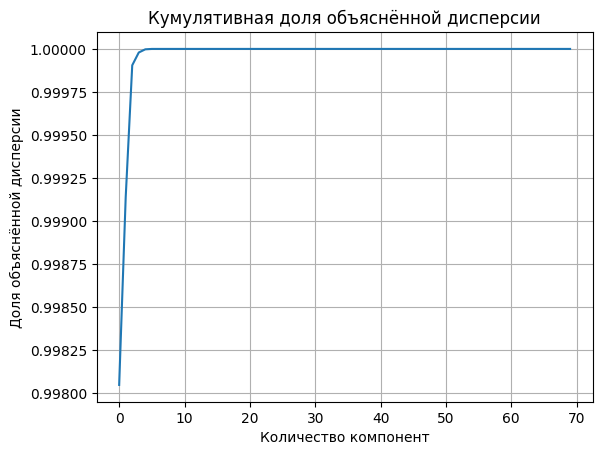

Количество компонент для сохранения 95% дисперсии: 1


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(clients)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel('Количество компонент')
plt.ylabel('Доля объяснённой дисперсии')
plt.title('Кумулятивная доля объяснённой дисперсии')
plt.grid()
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Количество компонент для сохранения 95% дисперсии: {n_components}")


In [21]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=5)
features_pca = pca.fit_transform(clients)




In [24]:
features_pca.shape

(495618, 5)

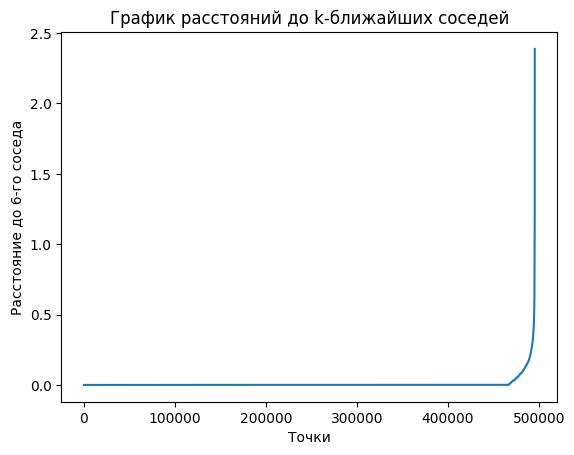

In [41]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Масштабируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_pca)

# Ищем расстояния до ближайших соседей
nearest_neighbors = NearestNeighbors(n_neighbors=6)  # min_samples = 5
nearest_neighbors.fit(features_scaled)
distances, indices = nearest_neighbors.kneighbors(features_scaled)

# Сортируем расстояния и строим график
distances = np.sort(distances[:, -1])  # Берем расстояния до k-го соседа
plt.plot(distances)
plt.xlabel("Точки")
plt.ylabel("Расстояние до 6-го соседа")
plt.title("График расстояний до k-ближайших соседей")
plt.show()


In [42]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=6)  # eps из графика
clusters = dbscan.fit_predict(features_scaled)


In [45]:
len(np.unique(clusters))

5097

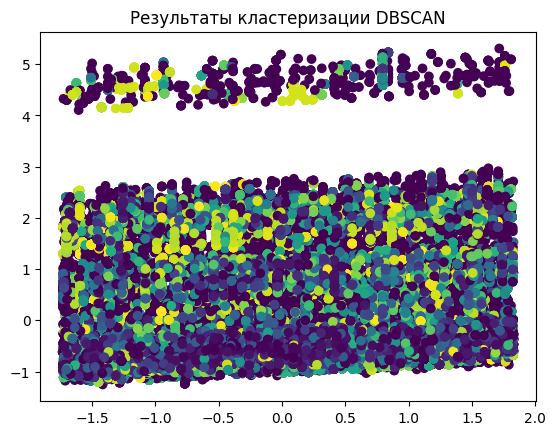

In [44]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 3], c=clusters, cmap='viridis')
plt.title("Результаты кластеризации DBSCAN")
plt.show()

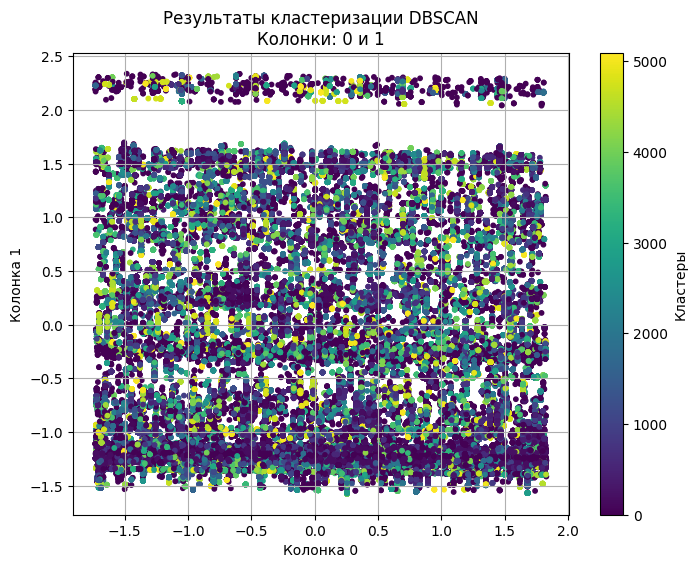

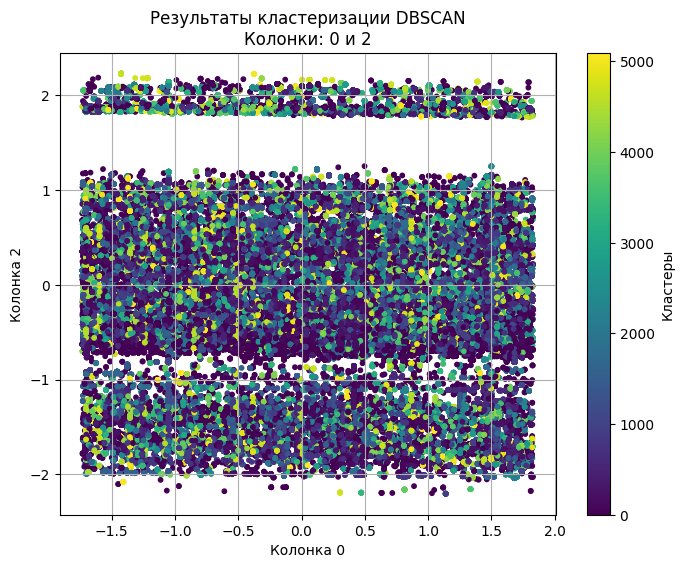

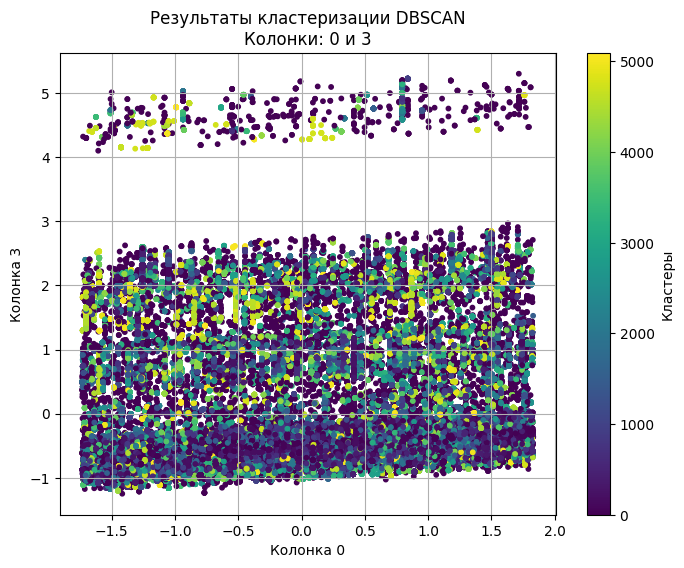

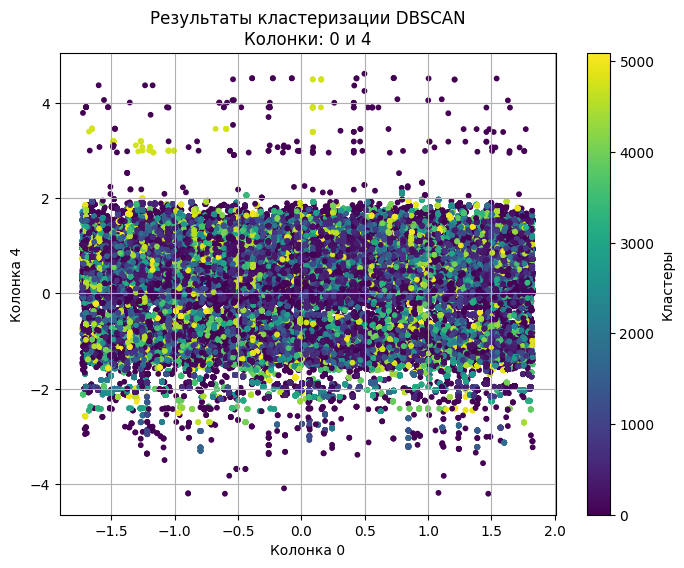

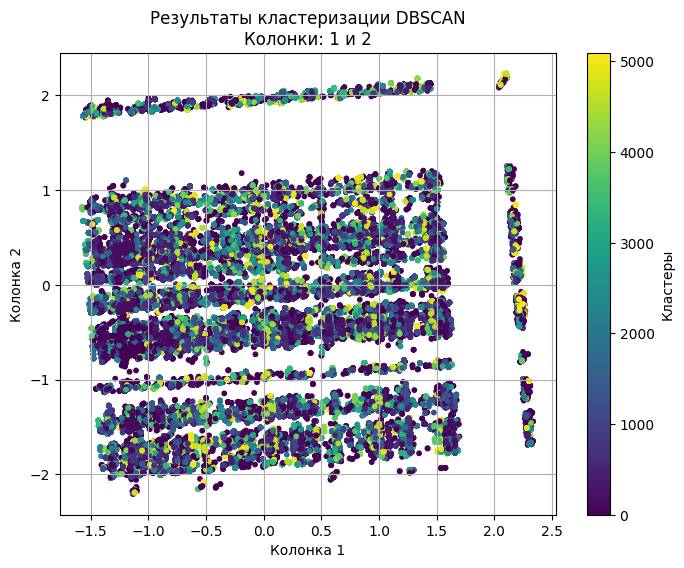

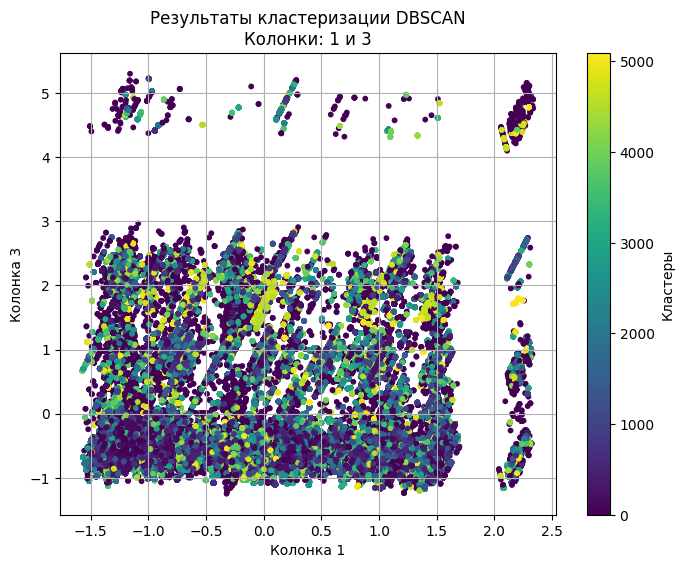

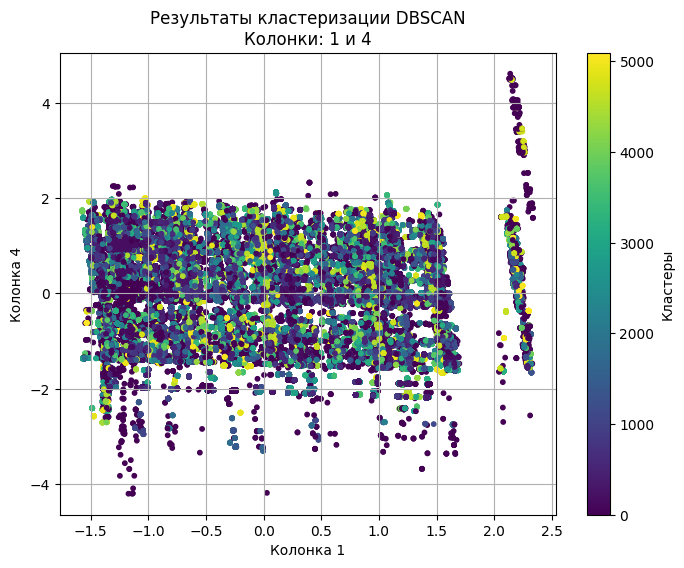

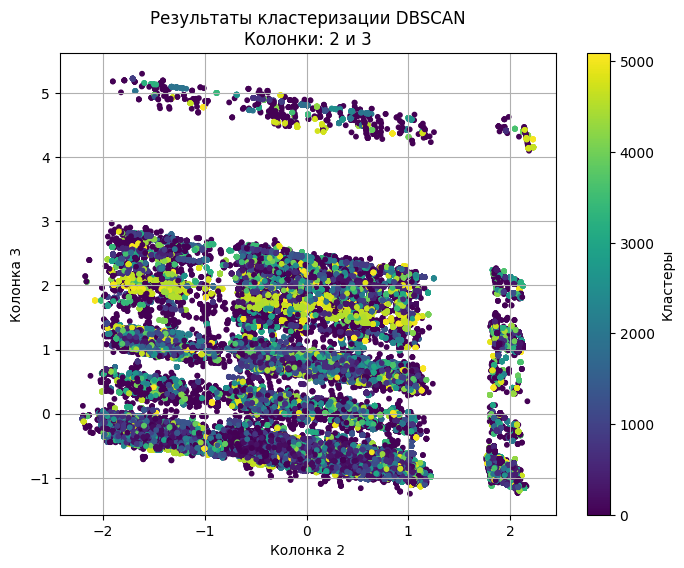

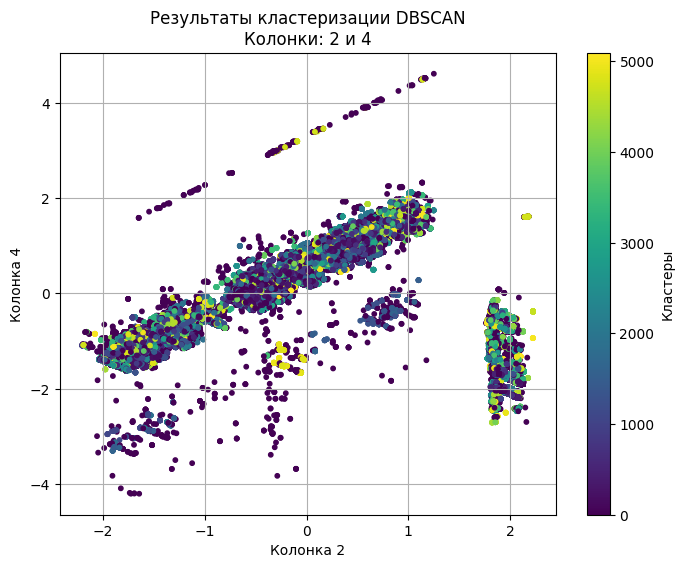

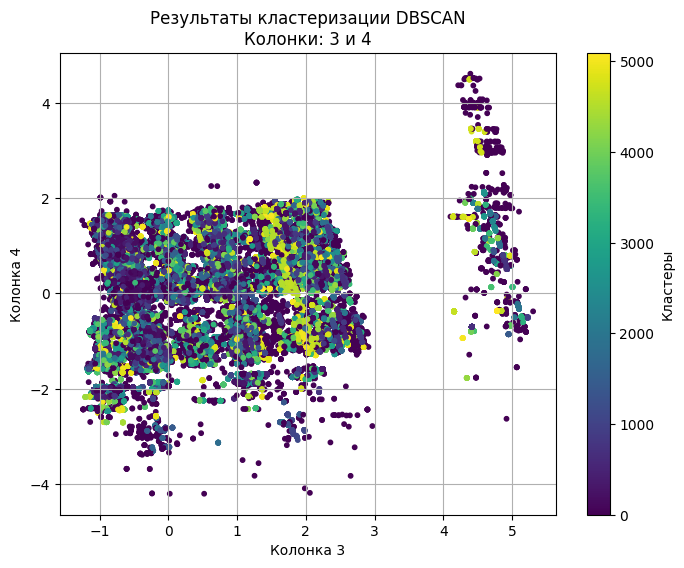

In [46]:
for i in range(5):  # Первая колонка
    for j in range(i + 1, 5):  # Вторая колонка (не совпадает с первой)
        plt.figure(figsize=(8, 6))
        plt.scatter(features_scaled[:, i], features_scaled[:, j], c=clusters, cmap='viridis', s=10)
        plt.title(f"Результаты кластеризации DBSCAN\nКолонки: {i} и {j}")
        plt.xlabel(f"Колонка {i}")
        plt.ylabel(f"Колонка {j}")
        plt.colorbar(label='Кластеры')
        plt.grid(True)
        plt.show()

In [31]:
tr_df_test = pd.read_csv("data/test_transaction.csv") 

In [32]:
id_df_test = pd.read_csv("data/test_identity.csv") 

In [ ]:
print(len(tr_df_train))
print(len(tr_df_test))
print(len(id_df_train))
print(len(id_df_test))

590540
506691
144233
141907


In [35]:
print(tr_df_train.shape)
print(tr_df_test.shape)
print(id_df_train.shape)
print(id_df_test.shape)

(590540, 394)
(506691, 393)
(144233, 41)
(141907, 41)
